In [86]:
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

In [87]:
url='https://books.toscrape.com/catalogue/category/books_1/index.html'

In [88]:
response=requests.get(url)
response

<Response [200]>

In [89]:
response=response.content

In [90]:
soup=BeautifulSoup(response,'html.parser')

In [91]:
ol=soup.find('ol')

In [92]:
articles=ol.find_all('article',class_='product_pod')

In [93]:
title=[]
price=[]
rating=[]
for article in articles:
  title.append(article.find('img')['alt'])
  rating.append(article.find('p')['class'][1])
  price.append(article.find('p',class_='price_color').text)


In [94]:
df=pd.DataFrame([title,price,rating])
df=df.T
df.columns=['Title','Price','Rating']
df['Rating'].replace({'One':1,'Two':2,'Three':3,'Four':4,'Five':5},inplace=True)
df['Price']=df['Price'].str[1:]
df['Price']=df['Price'].astype('float')

In [95]:
df1=df.groupby('Rating')['Price'].mean()
df1.index

Int64Index([1, 2, 3, 4, 5], dtype='int64', name='Rating')

Text(0.5, 0, 'Rating')

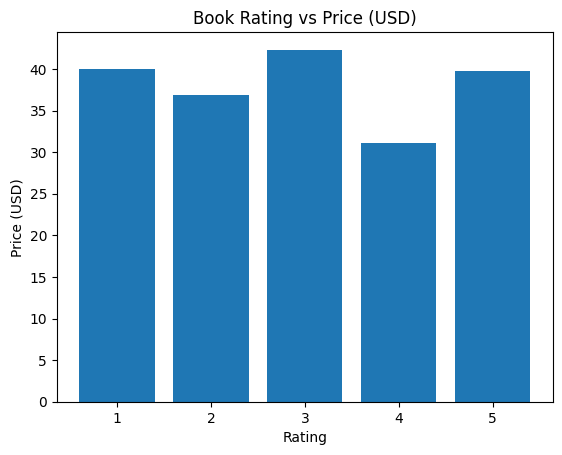

In [96]:
plt.bar(df1.index,df1.values)
plt.title('Book Rating vs Price (USD)')
plt.ylabel('Price (USD)')
plt.xlabel('Rating')